In [ ]:
# Fredkin

In [7]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
import networkx as nx
import tensorflow as tf
from pennylane.templates.layers import StronglyEntanglingLayers

In [8]:
# matrix representation of fredkin gate
U = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1]])


#@qml.qnode(dev)
#def U_actual():
#    qml.QubitUnitary(U,wires=[0,1,2])
#    return qml.state()
q=qml.QubitUnitary(U,wires=[0,1,2])
print(U)


[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]]


In [18]:
dev = qml.device("default.qubit.autograd", wires=3)


#@qml.qnode(dev)
def ansatz(params):
    l=params
    #H=Z⊗Z⊗I
    qml.CNOT(wires=[0,1])
    qml.RZ(l[0],wires=1)
    qml.CNOT(wires=[0,1])

    # circuit for local ham H=I⊗Z⊗Z
    qml.CNOT(wires=[1,2])
    qml.RZ(l[1],wires=2)
    qml.CNOT(wires=[1,2])
    
    
    # circuit for local ham H=Z⊗I⊗Z
    qml.CNOT(wires=[0,2])
    qml.RZ(l[2],wires=2)
    qml.CNOT(wires=[0,2])
    
    #qml.Identity(wires=0)*l[11]
   
    # single qubit gates
    
    # circuit for local ham H=I⊗I⊗Z+I⊗I⊗X+I⊗I⊗Y
    
    
    # circuit for local ham H=I⊗Z⊗I+I⊗X⊗I+I⊗Y⊗I
    #qml.Identity(wires=0) 
    #qml.RZ(l[3],wires=1)
   
    # circuit for local ham H=Z⊗I⊗I+X⊗I⊗I+Y⊗I⊗I
    qml.RZ(l[3],wires=0)
    '''
    #H=I⊗Z⊗ X
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[1,2])
    qml.RZ(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=2)
    
    
    # circuit for local ham H=Z⊗I⊗X
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[0,2])
    qml.RZ(l[6],wires=2)
    qml.CNOT(wires=[0,2])
    qml.Hadamard(wires=2)
    '''
    
    # important: more 2 qubit interations to be added....   

   
    

    # circuit for local ham H=X⊗X⊗I  
    #[qml.Hadamard(wires=i) for i in range(0,2)]
    [qml.Hadamard(wires=i) for i in range(0,2)]
    qml.CNOT(wires=[0,1])
    qml.RZ(l[4],wires=1)
    qml.CNOT(wires=[0,1])
    [qml.Hadamard(wires=i) for i in range(0,2)]
    
    # circuit for local ham H=X⊗I⊗X
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[0,2])
    qml.RZ(l[5],wires=2)
    qml.CNOT(wires=[0,2])
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    
    # circuit for local ham H=I⊗X⊗X
    [qml.Hadamard(wires=i) for i in range(1,3)]
    qml.CNOT(wires=[1,2])
    qml.RZ(l[6],wires=2)
    qml.CNOT(wires=[1,2])
    [qml.Hadamard(wires=i) for i in range(1,3)]
    
    #[qml.Hadamard(wires=i) for i in range(1,3)]
 


    # circuit for local ham H=I⊗Y⊗Y
    [qml.RX(np.pi/2,wires=i) for i in range(1,3)]
    qml.CNOT(wires=[1,2])
    qml.RZ(l[7],wires=2)
    qml.CNOT(wires=[1,2])
    [qml.RX(-np.pi/2,wires=i) for i in range(1,3)]




    qml.RX(l[8],wires=2)
    
   
 
    qml.RX(l[9],wires=1)
    
    #qml.RY(l[14],wires=0)
   
    '''
    #H=X⊗Z⊗ I
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.RZ(l[18],wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    
    #H=I⊗X⊗ Z
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1,2])
    qml.RZ(l[19],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=1)
    
      #H=I⊗X⊗ y
    qml.Hadamard(wires=1)
    qml.RX(np.pi/2,wires=2)
    qml.CNOT(wires=[1,2])
    qml.RZ(2*l[20],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=1)
    qml.RX(-np.pi/2,wires=2)
    
    #H=X⊗ y⊗I
    qml.Hadamard(wires=0)
    qml.RX(np.pi/2,wires=1)
    qml.CNOT(wires=[0,1])
    qml.RZ(2*l[21],wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    qml.RX(-np.pi/2,wires=1)
  
    '''

In [132]:
# ZGR ansatz
def ansatz2(l):
    qml.RY(l[0],wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(l[1],wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(l[2],wires=1)
    qml.CNOT(wires=[0,2])
    qml.RY(l[3],wires=2)
    qml.CNOT(wires=[1,2])
    qml.RY(l[4],wires=2)
    qml.CNOT(wires=[0,2])
    qml.RY(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    qml.RY(l[6],wires=2)

In [133]:
def ansatz3(l):
    [qml.RY(l[i],wires=i) for i in range(3)]
    qml.CNOT(wires=[2,0])
    [qml.CNOT(wires=[0,i]) for i in range(1,3)]
    [qml.RY(l[i+3],wires=i) for i in range(3)]
    qml.CNOT(wires=[0,2])
    [qml.CNOT(wires=[i,0]) for i in range(1,3)]
    

In [161]:
def ansatz4(l):
    StronglyEntanglingLayers(l,wires=[0,1,2])

In [19]:
@qml.qnode(dev, diff_method="backprop")

def circuit(params, state, apply_inv=True):
    qml.BasisState(np.array(state), wires=[0,1,2])
  
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])

    #ansatz2(params[:7])
    #ansatz3(params[:6])
    #ansatz4(params)
    
    #if apply_inv:
    #    qml.QubitUnitary(U,wires=[0,1,2]).inv()
    return qml.state()

@qml.qnode(dev, diff_method="backprop")
def target_st(state):
    qml.BasisState(np.array(state), wires=[0,1,2])
    qml.QubitUnitary(U,wires=[0,1,2]).inv() # fredkin gate
    return qml.state()

In [21]:
circ_ket=[]
for i in range(8):
    state=state_vector[i]
    circ_ket.append(circuit(params,state))
    
print(np.abs(circ_ket))


act_ket=[]
for i in range(8):
    state=state_vector[i]
    act_ket.append(target_st(state))
    
#print(act_ket)

[[0.48505403 0.1819256  0.34451549 0.27349175 0.30352116 0.21131869
  0.26188    0.57686669]
 [0.21420684 0.23452093 0.50664006 0.48662249 0.18637971 0.26967234
  0.53370892 0.1154296 ]
 [0.34686748 0.55107545 0.46853432 0.42494454 0.31364085 0.20848264
  0.14154911 0.1184263 ]
 [0.27005961 0.396513   0.38448612 0.33928969 0.39979042 0.45116409
  0.26870869 0.26704383]
 [0.30451153 0.30214376 0.42229345 0.42967975 0.19513809 0.52262292
  0.30316684 0.2233869 ]
 [0.1828183  0.23956742 0.17759631 0.31507415 0.61997584 0.37761398
  0.47225673 0.16847544]
 [0.23058186 0.5243322  0.13753038 0.21248876 0.37738256 0.45738556
  0.4691422  0.19007397]
 [0.58844794 0.16549514 0.16877244 0.25230453 0.22375887 0.10333733
  0.13893232 0.6739064 ]]


In [36]:
b=[]
for i in range(5,7):
    b.append(tf.math.real(np.sum(np.dot(act_ket[i],tf.math.conj(circ_ket[i])))))
print(b[0])
#print(np.real(a)-1)

tf.Tensor(-0.18708212505007982, shape=(), dtype=float64)


In [117]:
def cost3(params):
    circ_ket=[]
    act_ket=[]
    overlaps=[] 
    
    for i in range(8):
        state=state_vector[i]
        circ_ket.append(circuit(params,state))
        act_ket.append(target_st(state))

        overlaps.append((np.sum(np.dot(np.conj(circ_ket[i]),act_ket[i]))))
    #mean_overlap = tf.reduce_mean(overlaps)
    
    #cost = tf.abs(tf.reduce_sum(overlaps ))
    cost=0
    for i in range(8):
        cost+=(np.abs(overlaps[i]))**2
    cost_abs=1-(cost)/len(overlaps)   
    return cost_abs#, overlaps

In [118]:
cost3(params)

0.14853241889739

In [53]:
(target_st([1,0,1]).T).shape

(8,)

In [67]:
#shape = StronglyEntanglingLayers.shape(n_layers=5, n_wires=3)
#params=np.random.random(size=shape)
# specially for strongly entangles layered ansatz

params = np.random.random(10)
Id = np.eye(8, requires_grad=False)
state_vector=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
print(Id[7])
print(state_vector[7])

[0. 0. 0. 0. 0. 0. 0. 1.]
[1 1 1]


In [ ]:
params_known=[3*np.pi/8,np.pi/2,np.pi/8*np.sqrt(143/5),np.pi/8*np.sqrt(143/5),np.pi/8*5*np.sqrt(3),np.pi/8*5*np.sqrt(3),
              -3*np.pi/8,-3*np.pi/8,-3*np.pi/8,3*np.pi/4*np.sqrt(7/5),3*np.pi/4*np.sqrt(7/5)]
len(params_known)

In [125]:
abs(circuit(params,[1,0,1]))

tensor([1.08213158e-03, 9.02607221e-06, 1.56731386e-05, 1.63977005e-03,
        1.11368644e-03, 4.39448612e-01, 8.98264207e-01, 1.11022090e-03], requires_grad=True)

In [93]:
def cost_state(params, i):
    state=state_vector[i]
    return np.sum(np.square(circuit(params, state) - target_st(state)))

def cost(params):
    return  sum(abs(cost_state(params, i))**2 for i in range(8))/len(state_vector) #+sum(cost_state(params, i) for i in range(0,2))#+sum(cost_state(params, i) for i in range(2,6))

In [69]:
def cost1(params):
    return cost_state(params, 1)+cost_state(params, 6)+cost_state(params, 7)

In [94]:
opt = qml.AdagradOptimizer(stepsize=0.2)
cost_arr=[]
params_arr=[]
for i in range(1000+1):
    params = opt.step(cost, params)

    if i % 100 == 0:
        print(f"Cost at step {i}:", cost(params))
        cost_arr.append(cost(params))
        params_arr.append(params)

Cost at step 0: 1.0952420040234367
Cost at step 100: 0.00023977321404717369
Cost at step 200: 0.000110383557125468
Cost at step 300: 2.3607994498443618e-05
Cost at step 400: 3.296379787735608e-05
Cost at step 500: 3.617574592069013e-05
Cost at step 600: 1.1739241057330571e-05
Cost at step 700: 3.3256072624871992e-06
Cost at step 800: 1.1641513170720943e-06
Cost at step 900: 4.951994235012982e-07
Cost at step 1000: 2.4195358250999207e-07


In [102]:
opt = qml.AdamOptimizer(stepsize=0.2)

for i in range(1000+1):
    params = opt.step(cost3, params)

    if i % 100 == 0:
        print(f"Cost at step {i}:", cost3(params))

Cost at step 0: 0.5639535868405097
Cost at step 100: 0.1464681470024325
Cost at step 200: 0.1464466108411916
Cost at step 300: 0.14970509109191665
Cost at step 400: 0.14698233892814894
Cost at step 500: 0.16252196660860485
Cost at step 600: 0.147341020242019
Cost at step 700: 0.15113136173632524
Cost at step 800: 0.14704034328356386
Cost at step 900: 0.1475283467948525
Cost at step 1000: 0.14853241889739


In [95]:
cost_state(params,0)

tensor(-0.00056888-3.04558463e-05j, requires_grad=True)

In [136]:
params # for the last optimization ####

tensor([ 7.05959130e-03,  1.05041442e+00,  7.04528134e-03,
         1.31017884e+00,  1.02164535e+00,  1.02160283e+00,
         4.08733183e-01, -7.80485442e-01,  4.13271795e-04,
        -4.13272519e-04], requires_grad=True)

In [56]:
abs(circuit(params_arr[6], state_vector[0]))

tensor([0.14654124, 0.14648692, 0.40860815, 0.09707663, 0.39904542,
        0.38803021, 0.1652781 , 0.66600392], requires_grad=True)

In [178]:
opt = qml.optimize.RotosolveOptimizer()
# for ZGR == ansatz2

for i in range(40+1):
#for i in range(300+1):
    params = opt.step(cost3, params)

    if i % 10 == 0:
        print(f"Cost at step {i}:", cost3(params))

Cost at step 0: tf.Tensor(0.7950199767668706, shape=(), dtype=float64)
Cost at step 10: tf.Tensor(0.27411202836429577, shape=(), dtype=float64)
Cost at step 20: tf.Tensor(0.24797244526909235, shape=(), dtype=float64)
Cost at step 30: tf.Tensor(0.24080046238815112, shape=(), dtype=float64)
Cost at step 40: tf.Tensor(0.23799404807299399, shape=(), dtype=float64)


In [90]:
def get_unitary(params):
    return np.array([circuit(params, state, apply_inv=False) for state in state_vector]).T

In [115]:
print("\nOptimized unitary using Hamiltonian:\n", abs(get_unitary(params)))
print("\nOptimized unitary size:\n", get_unitary(params).shape)
print("\nActual Toffoli:\n", U)


Optimized unitary using Hamiltonian:
 [[9.10317142e-01 1.10979516e-03 1.10980086e-03 4.13905725e-01
  4.15813866e-08 1.08213158e-03 1.05655727e-03 3.29079228e-08]
 [1.10979532e-03 9.45137292e-01 3.25631679e-01 1.11431274e-03
  6.30255028e-03 9.02607221e-06 1.56743415e-05 2.52450835e-02]
 [1.10980070e-03 3.25631657e-01 9.45137434e-01 1.11431779e-03
  6.29978584e-03 1.56731386e-05 9.02746787e-06 2.52407097e-02]
 [4.13905725e-01 1.11431264e-03 1.11431789e-03 9.10315483e-01
  3.90052048e-08 1.63977005e-03 1.61248840e-03 2.63448388e-08]
 [8.54350455e-09 6.30216495e-03 6.30017056e-03 1.45407085e-08
  9.36818422e-01 1.11368644e-03 1.11370990e-03 3.49698947e-01]
 [1.06231059e-03 9.00388566e-06 1.56955902e-05 1.62171250e-03
  1.11368598e-03 4.39448612e-01 8.98264263e-01 1.11022108e-03]
 [1.07660631e-03 1.56519279e-05 9.04972479e-06 1.63056749e-03
  1.11371036e-03 8.98264207e-01 4.39448659e-01 1.11024468e-03]
 [1.51573779e-08 2.52454633e-02 2.52403300e-02 7.62179842e-09
  3.49698947e-01 1.11022

In [128]:
print("\nOptimized unitary using Strongly entangled layer with depth=5:\n", abs(get_unitary(params)))
print("\nOptimized unitary size:\n", get_unitary(params).shape)
print("\nActual Toffoli:\n", U)


Optimized unitary using Strongly entangled layer with depth=5:
 [[0.99834896 0.03448396 0.01479481 0.04124432 0.00989534 0.00524181
  0.00537331 0.00599748]
 [0.03386199 0.99920839 0.01146459 0.01297482 0.00905732 0.00529175
  0.00432287 0.0027292 ]
 [0.01403257 0.01108872 0.99917245 0.03388984 0.00976198 0.00361618
  0.0081718  0.00329591]
 [0.04205117 0.01185248 0.0333557  0.99840472 0.01022471 0.00443238
  0.00563857 0.00326256]
 [0.00962708 0.00896359 0.01008981 0.01019903 0.99936343 0.00456879
  0.010664   0.02755537]
 [0.00591822 0.00421764 0.00800659 0.00543843 0.01028011 0.04422034
  0.9988632  0.00804314]
 [0.00513955 0.00500185 0.00359168 0.00504159 0.00481183 0.99868516
  0.04418712 0.02371781]
 [0.0057786  0.0026178  0.00355979 0.00332225 0.02764266 0.02373661
  0.00774295 0.99927401]]

Optimized unitary size:
 (8, 8)

Actual Toffoli:
 [[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 

In [128]:
@qml.qnode(dev, diff_method="backprop")

def circuit2(params, state, apply_inv=True):
    qml.BasisState(np.array(state), wires=[0,1,2])
    #ansatz(params)
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    ansatz(params[:10])
    #qml.QubitUnitary(U,wires=[0,1,2]).inv()
    return qml.probs(wires=[0,1,2])

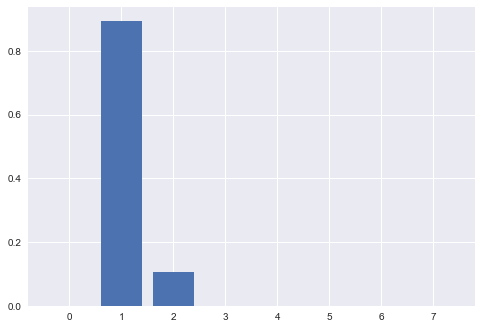

In [135]:
probs=circuit2(params,state_vector[1])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.show()

In [127]:
abs(circuit2(params,[1,0,1]))

tensor([4.26474487e-01, 4.45349292e-09, 4.33869008e-09, 4.26482405e-01,
        2.06635985e-04, 7.49185605e-01, 2.73775663e-01, 2.06636161e-04], requires_grad=True)

In [38]:
params

tensor([-0.10224091, -0.00248727,  0.00057808,  0.09926192,  0.00203833,
         0.00046096], requires_grad=True)

In [39]:
circuit.draw()

' 0: ──╭|0⟩──╭C──────────────╭C───RZ(0.00204)──────────────────────────────────────────────────────────────╭U0⁻¹──╭┤ State \n 1: ──├|1⟩──╰X──RZ(-0.102)──╰X──╭C──────────────────────────╭C──RZ(0.0993)───────╭C────────────────╭C─────├U0⁻¹──├┤ State \n 2: ──╰|0⟩──────────────────────╰X────────────RZ(-0.00249)──╰X──RX(0.000578)──H──╰X──RZ(0.000461)──╰X──H──╰U0⁻¹──╰┤ State \nU0 =\n[[1 0 0 0 0 0 0 0]\n [0 1 0 0 0 0 0 0]\n [0 0 1 0 0 0 0 0]\n [0 0 0 1 0 0 0 0]\n [0 0 0 0 1 0 0 0]\n [0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 0 1]\n [0 0 0 0 0 0 1 0]]\n'

In [149]:
grad_vals = []
grad = qml.grad(cost, argnum=0)
params = np.random.random(10)

In [150]:
gradient = grad(params)

In [151]:
grad_vals.append(gradient[-1])

print("Variance of the gradients circuit: {}".format(
 np.var(gradient)
    )
)

Variance of the gradients circuit: 3.1326292740896613


In [6]:
point1 = np.array((1, 1, 1.1))
point2 = np.array((1.4, 0.8, 0.9))
  
# calculating Euclidean distance
# using linalg.norm()
dist = np.linalg.norm(point1 - point2)
  
# printing Euclidean distance
print(dist)

0.48989794855663554
